#Enunciados dos Trabalhos para Casa (TPC)
da UC de **Processamento de Linguagens**,
ano Letivo 2022/23 , 3º ano de LEI

Relativos à 1º parte do programa: Filtros de Texto baseados em ER
**texto em negrito**

# TPC1: Análise de dados: doença cardíaca
(publicado em **2023.02.14**)

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

Bibliotecas utilizadas


In [13]:
import os
import matplotlib.pyplot as plt

Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;

In [14]:
def read_data(file):
    with open(file) as file:
        content = file.readlines()

    data = []

    for line in content[1:]:  # remove header
        idade, sexo, tensão, colesterol, batimento, temDoença = line.strip().split(",")
        data.append((int(idade), sexo, int(tensão), int(colesterol), int(batimento), bool(int(temDoença))))

    return data

Pense num modelo para guardar uma distribuição e Crie uma função que imprime na forma de uma tabela uma distribuição;

In [15]:
class Dist:
    def __init__(self, data={}, metric=""):
        # data should be a list of tuples
        # where first element is the value and second element is the frequency
        self.data = data
        # name of the distribution
        self.name = metric

    def __repr__(self):
        i = 0
        if self.name == "género":
            i = 23
        elif self.name == "colesterol":
            i = 27
        else:
            i = 22

        print("+" + "-" * i + "+")
        print(f"|  {self.name}  | doentes(%) |")
        print("+" + "-" * i + "+")
        for pair in self.data.items():
            if self.name == "idade":
                print(f"| [{pair[0][0]}-{pair[0][1]}] |   {pair[1]:.2f}%   |")
            elif self.name == "género":
                print(f"|   {pair[0]}      |    {pair[1]:.2f}%  |")
            else:
                if pair[0][0] < 100:
                    print(f"|  [{pair[0][0]}-{pair[0][1]}]    |   {pair[1]:.2f}%   |")
                else:
                    if pair[1] < 100:
                        print(f"|  [{pair[0][0]}-{pair[0][1]}]   |   {pair[1]:.2f}%   |")
                    else:
                        print(f"|  [{pair[0][0]}-{pair[0][1]}]   |   {pair[1]:.2f}%  |")
        print("+" + "-" * i + "+")


Crie uma função que calcula a distribuição da doença por sexo;

In [16]:
def dist_gender(data):
    totalgender = {"F": 0, "M": 0}
    distgender = {}
    for d in data:
        totalgender[d[1]] += 1
        if d[-1]:
            if d[1] not in distgender:
                distgender[d[1]] = 0
            distgender[d[1]] += 1
    distgender["F"] = (distgender["F"] / totalgender["F"]) * 100
    distgender["M"] = (distgender["M"] / totalgender["M"]) * 100

    return distgender

Crie uma função que calcula a distribuição da doença por escalões etários.

In [17]:
def dist_idade(data):
    distidade = {}
    maxIdade = max([d[0] for d in data])

    for idade in range(30, maxIdade, 5):
        total = [d for d in data if d[0] in range(idade, idade + 5)]  # intervalos de 5 em 5
        doentes = [d for d in total if d[5]]  # doentes pertencentes ao intervalo de idade
        distidade[(idade, idade + 4)] = (len(doentes) / len(total)) * 100

    return distidade

Crie uma função que calcula a distribuição da doença por níveis de colesterol. 

In [18]:
def dist_colesterol(data):
    distcolesterol = {}
    maxColesterol = max([d[3] for d in data])
    minColesterol = min([d[3] for d in data if d[3] != 0 and d[5]])  # desconsidero dados que contém 0 de colesterol

    for colesterol in range(minColesterol, maxColesterol, 10):
        total = [d for d in data if d[3] in range(colesterol, colesterol + 10) and d[3] != 0]  # intervalos de 10 em 10
        doentes = [d for d in total if d[5] and d[3] != 0]
        if doentes:
            distcolesterol[(colesterol, colesterol + 9)] = (len(doentes) / len(total)) * 100

    return distcolesterol

Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

In [22]:
def grafico(dist, metric):
    values = list(map(str, dist.keys()))
    percentages = list(dist.values())

    fig = plt.figure(figsize=(10, 5))

    fig, ax = plt.subplots()

    ax.set_title(f"Distribuição da doença por {metric}")
    ax.set_ylabel("Número de pessoas")
    ax.set_xlabel(f"{metric}")

    ax.bar(values, percentages, color='pink',
           width=0.4)

    # set the x-tick labels with more space between them
    ax.set_xticks(range(len(dist)))
    ax.set_xticklabels(dist.keys(), rotation=45, ha='right')

    # add padding to the bottom of the plot
    plt.tight_layout(pad=3)

    # display the graph
    plt.show()

Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;


1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Gráficos da distribuição da doença por sexo
5. Gráficos da distribuição da doença por escalões etários
6. Gráficos da distribuição da doença por níveis de colesterol
0. Sair
introduza a sua opção-> 1
+-----------------------+
|  género  | doentes(%) |
+-----------------------+
|   F      |    23.67%  |
|   M      |    63.88%  |
+-----------------------+
prima enter para continuar

1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Gráficos da distribuição da doença por sexo
5. Gráficos da distribuição da doença por escalões etários
6. Gráficos da distribuição da doença por níveis de colesterol
0. Sair
introduza a sua opção-> 4


<Figure size 720x360 with 0 Axes>

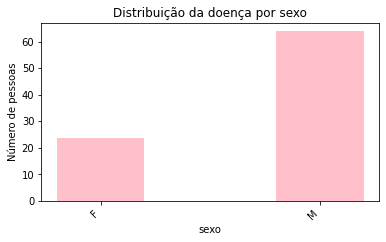

prima enter para continuar

1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Gráficos da distribuição da doença por sexo
5. Gráficos da distribuição da doença por escalões etários
6. Gráficos da distribuição da doença por níveis de colesterol
0. Sair
introduza a sua opção-> 2
+----------------------+
|  idade  | doentes(%) |
+----------------------+
| [30-34] |   35.29%   |
| [35-39] |   35.85%   |
| [40-44] |   30.68%   |
| [45-49] |   47.66%   |
| [50-54] |   49.40%   |
| [55-59] |   66.28%   |
| [60-64] |   74.81%   |
| [65-69] |   69.23%   |
| [70-74] |   73.91%   |
| [75-79] |   71.43%   |
+----------------------+
prima enter para continuar

1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Gráficos da distribuição da doença por sexo
5. Gráficos da distribuição da doença por escalões etários
6. Gráficos da dist

<Figure size 720x360 with 0 Axes>

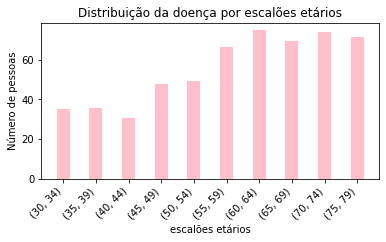

prima enter para continuar

1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Gráficos da distribuição da doença por sexo
5. Gráficos da distribuição da doença por escalões etários
6. Gráficos da distribuição da doença por níveis de colesterol
0. Sair
introduza a sua opção-> 3
+---------------------------+
|  colesterol  | doentes(%) |
+---------------------------+
|  [100-109]   |   50.00%   |
|  [110-119]   |   100.00%  |
|  [120-129]   |   50.00%   |
|  [130-139]   |   33.33%   |
|  [140-149]   |   33.33%   |
|  [150-159]   |   75.00%   |
|  [160-169]   |   27.27%   |
|  [170-179]   |   50.00%   |
|  [180-189]   |   32.00%   |
|  [190-199]   |   29.73%   |
|  [200-209]   |   40.43%   |
|  [210-219]   |   47.54%   |
|  [220-229]   |   42.86%   |
|  [230-239]   |   49.02%   |
|  [240-249]   |   44.68%   |
|  [250-259]   |   45.00%   |
|  [260-269]   |   57.14%   |
|  [270-279]   |   45.00%   |
|  [28

<Figure size 720x360 with 0 Axes>

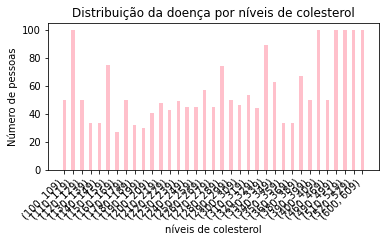

prima enter para continuar

1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Gráficos da distribuição da doença por sexo
5. Gráficos da distribuição da doença por escalões etários
6. Gráficos da distribuição da doença por níveis de colesterol
0. Sair
introduza a sua opção-> 0
saindo.......


In [23]:
def main():
    data = read_data("myheart.csv")
    saida = -1
    ageDist = Dist()
    genderDist = Dist()
    colesterolDist = Dist()
    while saida != 0:
        print("")
        print("1. Distribuição da doença por sexo")
        print("2. Distribuição da doença por escalões etários")
        print("3. Distribuição da doença por níveis de colesterol")
        print("4. Gráficos da distribuição da doença por sexo")
        print("5. Gráficos da distribuição da doença por escalões etários")
        print("6. Gráficos da distribuição da doença por níveis de colesterol")
        print("0. Sair")

        saida = int(input("introduza a sua opção-> "))

        if saida == 0:
            print("saindo.......")
        elif saida == 1:
            genderDist.data = dist_gender(data)
            genderDist.name = "género"
            genderDist.__repr__()
        elif saida == 2:
            ageDist.data = dist_idade(data)
            ageDist.name = "idade"
            ageDist.__repr__()
        elif saida == 3:
            colesterolDist.data = dist_colesterol(data)
            colesterolDist.name = "colesterol"
            colesterolDist.__repr__()
        elif saida == 4:
            if genderDist.name == "":
                genderDist.data = dist_gender(data)
                genderDist.name = "género"
            grafico(genderDist.data, "sexo")
        elif saida == 5:
            if ageDist.name == "":
                ageDist.data = dist_idade(data)
                ageDist.name = "idade"
            grafico(ageDist.data, "escalões etários")
        elif saida == 6:
            if colesterolDist.name == "":
                colesterolDist.data = dist_colesterol(data)
                colesterolDist.name = "colesterol"
            grafico(colesterolDist.data, "níveis de colesterol")
        else:
            print("you didn't add anything")
        if saida != 0:
            l = input("prima enter para continuar")

        os.system('clear')


main()
